In [3]:
# Step 1: Data Exploration & Visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [5]:
train_data = pd.read_csv('/content/train_data.csv')
test_data = pd.read_csv('/content/test_data.csv')

In [6]:
train_data.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820
4,46,female,28.900,2,no,southwest,178,8823.27900


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


In [8]:
test_data.head()

,age,sex,bmi,children,smoker,region,id
0,45,female,25.175,2,no,northeast,764
1,36,female,30.020,0,no,northwest,887
2,64,female,26.885,0,yes,northwest,890
3,46,male,25.745,3,no,northwest,1293
4,19,male,31.920,0,yes,northwest,259


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
 6   id        335 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.4+ KB


In [10]:
train_data['sex'].value_counts()

,count
sex,
male,506
female,497


In [11]:
# Select only numeric columns
numeric_columns = test_data.select_dtypes(include=['number'])
# Count the number of numeric columns
num_numeric_variables = numeric_columns.shape[1]
print(f"Number of numeric data type variables: {num_numeric_variables}")

Number of numeric data type variables: 4


In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [13]:
test_data['sex']= label_encoder.fit_transform(test_data['sex'])
test_data['smoker']= label_encoder.fit_transform(test_data['smoker'])

In [14]:
# Check if the 'charges' column exists in the DataFrame
if 'charges' in test_data.columns:
    # Create the box plot
    sns.boxplot(test_data['charges'])
else:
    # Print an error message if the column is not found
    print("Error: 'charges' column not found in the DataFrame.")

    # If column name is different (e.g., 'Charges' instead of 'charges')
    # Print available columns
    print("Available columns:", test_data.columns)

Error: 'charges' column not found in the DataFrame.
Available columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'id'], dtype='object')


Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

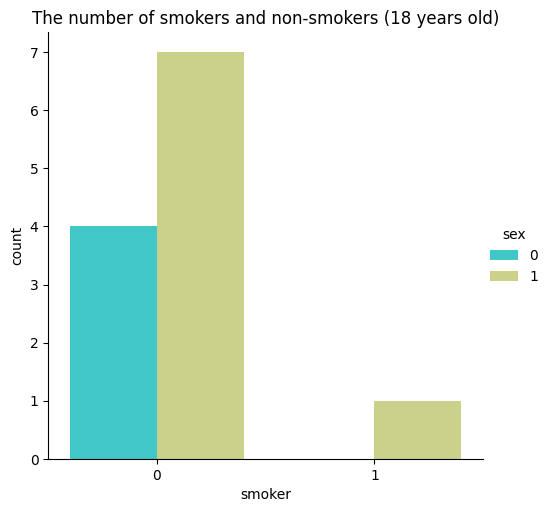

In [15]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=test_data[(test_data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

In [16]:
test_data['region'].value_counts()

,count
region,
southeast,105
northwest,79
southwest,78
northeast,73


In [17]:
test_data['children'].value_counts()

,count
children,
0,149
1,78
2,61
3,37
5,6
4,4


In [18]:
test_data['smoker'].value_counts()

,count
smoker,
0,267
1,68


In [19]:
test_data.describe()

,age,sex,bmi,children,smoker,id
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,39.062687,0.507463,31.117343,1.065672,0.202985,673.367164
std,14.102457,0.500692,6.333625,1.209438,0.402823,386.392527
min,18.000000,0.000000,16.815000,0.000000,0.000000,10.000000
25%,26.000000,0.000000,26.505000,0.000000,0.000000,348.000000
50%,39.000000,1.000000,30.800000,1.000000,0.000000,650.000000
75%,51.000000,1.000000,35.272500,2.000000,0.000000,1019.500000
max,64.000000,1.000000,52.580000,5.000000,1.000000,1334.000000


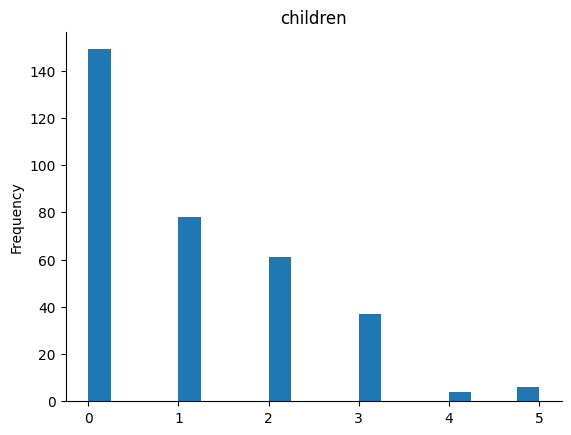

In [22]:
from matplotlib import pyplot as plt
test_data['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='charges', ylabel='Count'>

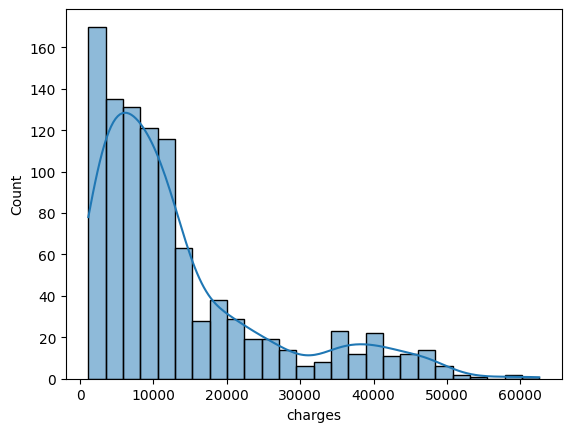

In [24]:
sns.histplot(data=train_data,x='charges',kde=True)

In [27]:
train_data['sex']= label_encoder.fit_transform(train_data['sex'])
train_data['smoker']= label_encoder.fit_transform(train_data['smoker'])

In [29]:
train_data['region']= label_encoder.fit_transform(train_data['region'])

<Axes: >

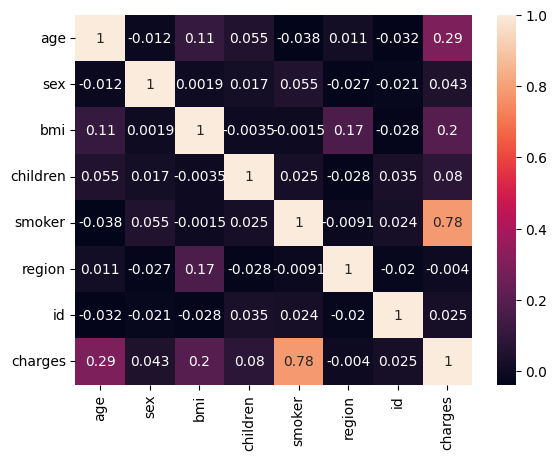

In [30]:
sns.heatmap(train_data.corr(),annot=True)